In [1]:
import numpy as np

In [2]:
# Generate a dummy dataset
X = np.random.randint(10, 50, 100).reshape(20, 5)

In [8]:
# mean centering the data
X_meaned = X - np.mean(X, axis=0)

In [9]:
# calculating the covariance matrix of the mean-centered data
cov_mat = np.cov(X_meaned, rowvar=False)

In [11]:
print(cov_mat)

[[165.48421053  11.83684211 -13.37368421  -6.21052632  17.57894737]
 [ 11.83684211 145.18684211  -0.18157895 -10.26315789  44.23684211]
 [-13.37368421  -0.18157895  57.60789474  -2.31578947  27.81578947]
 [ -6.21052632 -10.26315789  -2.31578947 115.36842105 -33.89473684]
 [ 17.57894737  44.23684211  27.81578947 -33.89473684 149.84210526]]


In [14]:
# calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

In [16]:
eigen_values

array([ 45.03473724,  94.38518686, 119.71065441, 159.61745564,
       214.74143953])

In [24]:
# sort the Eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [25]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data

n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T

In [28]:
print(X_reduced)

[[  3.96991247  13.45809882]
 [  8.56285803 -10.44813691]
 [  1.34318879  -2.44557744]
 [ -1.82772603 -11.62612591]
 [  0.32352342 -16.58324916]
 [ -7.66046856 -23.51354092]
 [ 14.95796445  -8.87194155]
 [ -0.28191564   7.03835538]
 [  9.45872773   3.61545095]
 [ -3.6925174   16.85060393]
 [ 13.35575235  16.24356307]
 [-19.41580132   7.8170866 ]
 [  5.83874853 -12.31349181]
 [-30.46897565  -0.89208363]
 [ 23.74491625   0.63842326]
 [ -7.27076446  -7.10345627]
 [ 11.12278714  24.36479792]
 [ 19.54029825  -8.8026726 ]
 [-27.68593672   0.38277524]
 [-13.91457162  12.19112103]]


In [1]:
from sklearn.datasets import load_iris

In [7]:
data = load_iris()
X = data.data
y = data.target

In [10]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaled_X = StandardScaler().fit_transform(X.T)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [18]:
pca.fit(scaled_X)
pca_data = pca.transform(scaled_X)

In [25]:
import numpy as np
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

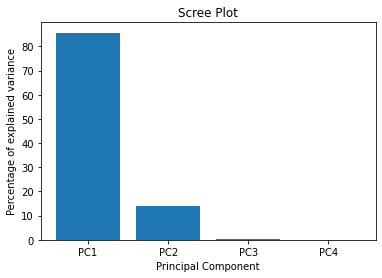

In [27]:
import matplotlib.pyplot as plt

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [29]:
pca_data.shape

(4, 4)

In [30]:
import pandas as pd

pca_df = pd.DataFrame(pca_data, index=data.feature_names, columns=labels)
pca_df

,PC1,PC2,PC3,PC4
sepal length (cm),16.159427,-1.308981,0.562507,-7.534184e-15
sepal width (cm),-3.118805,-6.195034,-0.628825,3.811558e-15
petal length (cm),2.372139,6.606103,-0.563896,1.952751e-15
petal width (cm),-15.412762,0.897912,0.630214,2.305073e-15


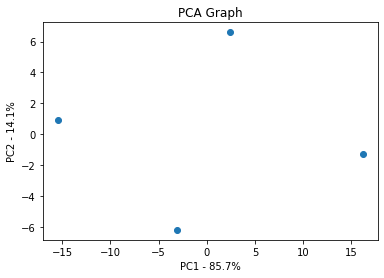

In [36]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC2 - {per_var[1]}%")
plt.show()

In [42]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

sorted_loading_scores

64    0.088163
57    0.088082
79    0.088065
93    0.087925
65    0.087920
        ...   
32    0.070368
16    0.070116
33    0.069775
15    0.068998
22    0.067151
Length: 150, dtype: float64

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']